# Question 1

In [101]:
import pandas as pd

# Step 2
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3
users = pd.read_csv(url, sep='|', index_col='user_id')

# Step 4
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

# Step 5
male_ratio_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
male_ratio_per_occupation['male_ratio'] = male_ratio_per_occupation['M'] / (male_ratio_per_occupation['M'] + male_ratio_per_occupation['F'])
sorted_male_ratio_per_occupation = male_ratio_per_occupation['male_ratio'].sort_values(ascending=False)

# Step 6
min_max_ages_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

# Step 7
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()

# Step 8
gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_percentage_per_occupation['total'] = gender_percentage_per_occupation['M'] + gender_percentage_per_occupation['F']
gender_percentage_per_occupation['percentage_male'] = (gender_percentage_per_occupation['M'] / gender_percentage_per_occupation['total']) * 100
gender_percentage_per_occupation['percentage_female'] = (gender_percentage_per_occupation['F'] / gender_percentage_per_occupation['total']) * 100

print("Mean age per occupation:\n", mean_age_per_occupation)
print("\nMale ratio per occupation (sorted):\n", sorted_male_ratio_per_occupation)
print("\nMinimum and maximum ages per occupation:\n", min_max_ages_per_occupation)
print("\nMean age per occupation and sex:\n", mean_age_per_occupation_sex)
print("\nPercentage of women and men per occupation:\n", gender_percentage_per_occupation)


Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other    

# Question 2

In [102]:
import pandas as pd

# Step 2
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Step 3
euro12 = pd.read_csv(url)

# Step 4
goal_column = euro12['Goals']

# Step 5: How many teams participated in Euro2012?
num_teams = euro12['Team'].nunique()

# Step 6
num_columns = euro12.shape[1]

# Step 7
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

# Step 9
mean_yellow_cards = discipline['Yellow Cards'].mean()

# Step 10
teams_more_than_six_goals = euro12[euro12['Goals'] > 6]

# Step 11
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Step 12
first_seven_columns = euro12.iloc[:, :7]

# Step 13
all_columns_except_last_three = euro12.iloc[:, :-3]

# Step 14
shooting_accuracy_selected_teams = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print("Goal column:\n", goal_column)
print("\nNumber of teams participated in Euro2012:", num_teams)
print("\nNumber of columns in the dataset:", num_columns)
print("\nDiscipline dataframe:\n", discipline)
print("\nTeams sorted by Red Cards, then Yellow Cards:\n", discipline_sorted)
print("\nMean Yellow Cards given per team:", mean_yellow_cards)
print("\nTeams that scored more than 6 goals:\n", teams_more_than_six_goals)
print("\nTeams starting with 'G':\n", teams_starting_with_G)
print("\nFirst 7 columns:\n", first_seven_columns)
print("\nAll columns except the last 3:\n", all_columns_except_last_three)
print("\nShooting Accuracy from England, Italy, and Russia:\n", shooting_accuracy_selected_teams)


Goal column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of teams participated in Euro2012: 16

Number of columns in the dataset: 35

Discipline dataframe:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spai

# Question 3

In [103]:
import pandas as pd
import numpy as np

# Step 2
series_1 = pd.Series(np.random.randint(1, 5, size=100), name='bedrs')
series_2 = pd.Series(np.random.randint(1, 4, size=100), name='bathrs')
series_3 = pd.Series(np.random.randint(10000, 30001, size=100), name='price_sqr_meter')

# Step 3
housing_df = pd.concat([series_1, series_2, series_3], axis=1)

# Step 4
housing_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5
bigcolumn_df = pd.concat([series_1, series_2, series_3], axis=0, ignore_index=True)

# Step 6
print("Is it true that 'bigcolumn' goes only until index 99?", bigcolumn_df.index.max() == 99)

# Step 7
bigcolumn_df.reset_index(drop=True, inplace=True)

print("DataFrame by joining the Series by column:\n", housing_df)
print("\nOne-column DataFrame 'bigcolumn':\n", bigcolumn_df)


Is it true that 'bigcolumn' goes only until index 99? False
DataFrame by joining the Series by column:
     bedrs  bathrs  price_sqr_meter
0       1       3            20834
1       3       1            19736
2       3       1            23699
3       4       2            17549
4       4       2            23312
..    ...     ...              ...
95      1       2            21615
96      4       1            11662
97      1       2            14516
98      2       3            11908
99      3       3            27657

[100 rows x 3 columns]

One-column DataFrame 'bigcolumn':
 0          1
1          3
2          3
3          4
4          4
       ...  
295    21615
296    11662
297    14516
298    11908
299    27657
Length: 300, dtype: int32


# Question 4

In [104]:
import pandas as pd
import numpy as np

# Step 2
data = pd.read_table('wind.txt', sep='\s+')

# Step 3
data['date'] = data.apply(lambda row: pd.to_datetime(f"{int(row['Yr']):02d}-{int(row['Mo']):02d}-{int(row['Dy']):02d}", format='%y-%m-%d'), axis=1)
data = data.set_index('date')
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)

# Step 4. Create a function to fix the year and apply it.
def fix_year(year):
    if year > 2000:
        return year - 100
    else:
        return year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))

# Step 5
data.index = pd.to_datetime(data.index)

# Step 6
missing_values = data.isnull().sum()

# Step 7
non_missing_values = data.notnull().sum().sum()

# Step 8
mean_windspeed = data.stack().mean()
print("Step 8 : ", mean_windspeed)

# Step 9
loc_stats = data.describe(percentiles=[])
print("Step 9 : ", loc_stats)

# Step 10
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)
print("Step 10 : ", day_stats)

# Step 11
january_average = data[data.index.month == 1].mean()
print("Step 11 : ", january_average)

# Step 12
yearly_data = data.resample('Y').mean()
print("Step 12 : ", yearly_data)

# Step 13
monthly_data = data.resample('M').mean()
print("Step 13 : ", monthly_data)

# Step 14
weekly_data = data.resample('W').mean()
print("Step 14 : ", weekly_data)

# Step 15
weekly_stats = data.resample('W-Mon').agg(['min', 'max', 'mean', 'std']).iloc[:52, :]
print("Step 15 : ", weekly_stats)

Step 8 :  10.22788376428218
Step 9 :                 RPT          VAL          ROS          KIL          SHA  \
count  6568.000000  6571.000000  6572.000000  6569.000000  6572.000000   
mean     12.362987    10.644314    11.660526     6.306468    10.455834   
std       5.618413     5.267356     5.008450     3.605811     4.936125   
min       0.670000     0.210000     1.500000     0.000000     0.130000   
50%      11.710000    10.170000    10.920000     5.750000     9.960000   
max      35.800000    33.370000    33.840000    28.460000    37.540000   

               BIR          DUB          CLA          MUL          CLO  \
count  6574.000000  6571.000000  6572.000000  6571.000000  6573.000000   
mean      7.092254     9.797343     8.495053     8.493590     8.707332   
std       3.968683     4.977555     4.499449     4.166872     4.503954   
min       0.000000     0.000000     0.000000     0.000000     0.040000   
50%       6.830000     9.210000     8.080000     8.170000     8.290000   

# Question 5

In [105]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Step 3
chipo = pd.read_csv(url, delimiter='\t')

# Step 4
print(chipo.head(10))

# Step 5
print("Number of observations:", len(chipo))

# Step 6
print("Number of columns:", len(chipo.columns))

# Step 7
print("Columns:", chipo.columns)

# Step 8
print("Index:", chipo.index)

# Step 9
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered_item)

# Step 10
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Number of items ordered for the most-ordered item:", most_ordered_item_count)

# Step 11
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
print("Most-ordered item in choice_description:", most_ordered_choice_description)

# Step 12
total_items_ordered = chipo['quantity'].sum()
print("Total number of items ordered:", total_items_ordered)

# Step 13
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)

# Step 13.1
print("Item price type:", chipo['item_price'].dtype)

# Step 13.2
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

# Step 13.3
print("Item price type after conversion:", chipo['item_price'].dtype)

# Step 14
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Revenue for the period:", revenue)

# Step 15
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)

# Step 16
average_revenue_per_order = revenue / num_orders
print("Average revenue amount per order:", average_revenue_per_order)

# Step 17
num_different_items_sold = chipo['item_name'].nunique()
print("Number of different items sold:", num_different_items_sold)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

# Question 6

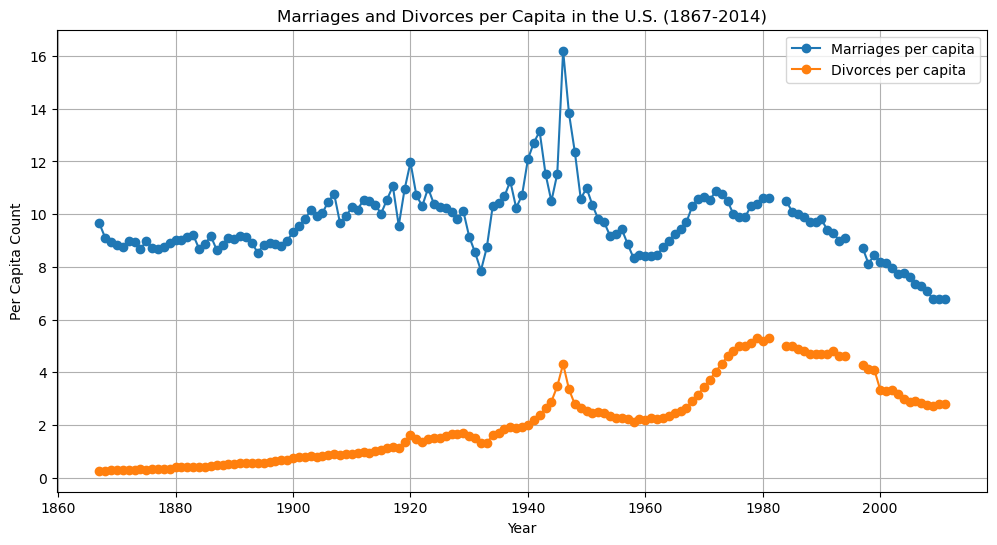

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

data['Marriages_per_capita'] = data['Marriages'] / data['Population'] * 1000
data['Divorces_per_capita'] = data['Divorces'] / data['Population'] * 1000

plt.figure(figsize=(12, 6))

plt.plot(data['Year'], data['Marriages_per_capita'], label='Marriages per capita', marker='o')

plt.plot(data['Year'], data['Divorces_per_capita'], label='Divorces per capita', marker='o')

plt.xlabel('Year')
plt.ylabel('Per Capita Count')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

plt.legend()

plt.grid(True)
plt.show()


# Question 7

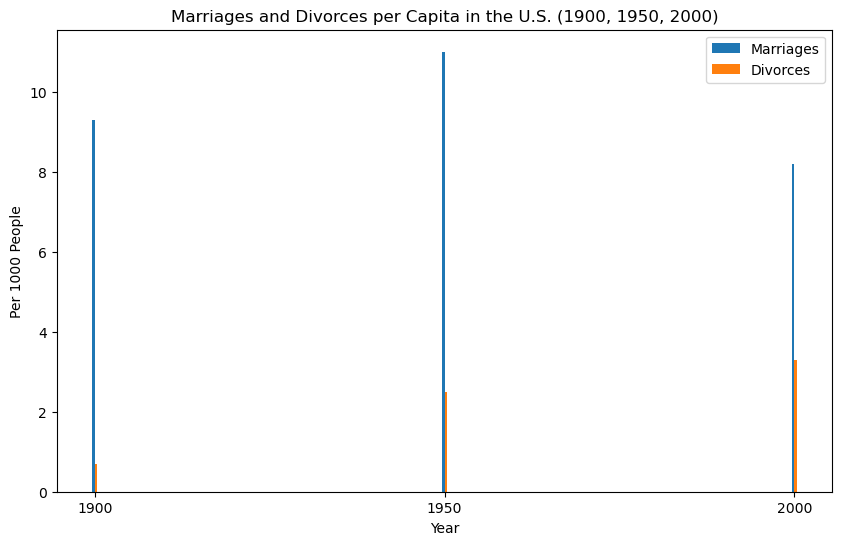

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(filtered_data['Year'] - bar_width/2, filtered_data['Marriages_per_1000'], bar_width, label='Marriages')

plt.bar(filtered_data['Year'] + bar_width/2, filtered_data['Divorces_per_1000'], bar_width, label='Divorces')

plt.xlabel('Year')
plt.ylabel('Per 1000 People')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks(filtered_data['Year'])
plt.legend()

plt.show()


# Question 8

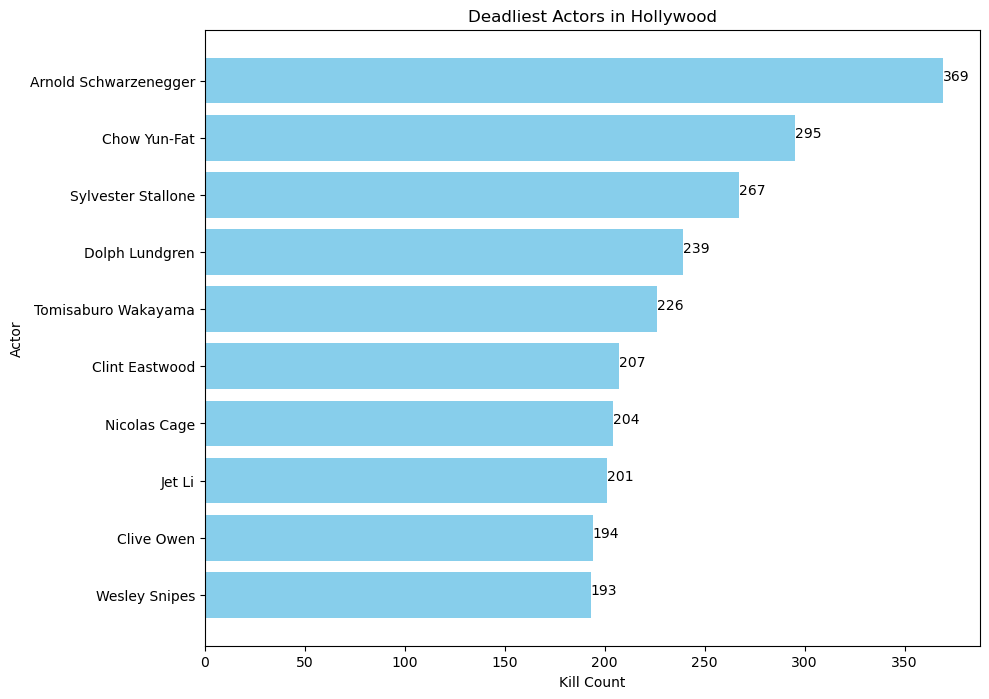

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('actor_kill_counts.csv')

data = data.sort_values(by='Count', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(data['Actor'], data['Count'], color='skyblue')

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

for index, value in enumerate(data['Count']):
    plt.text(value, index, str(value))

plt.show()


# Question 9

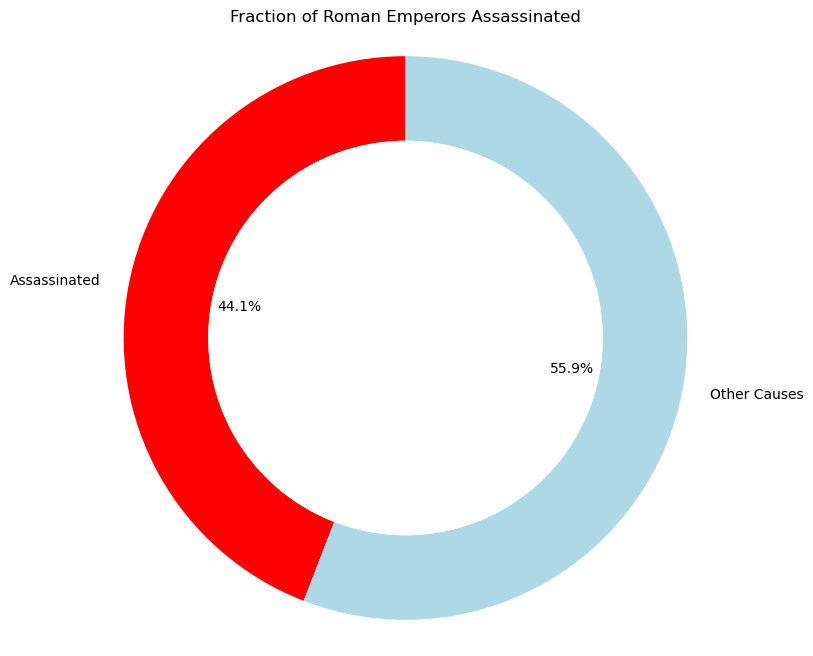

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('roman-emperor-reigns.csv')

assassinated_count = data[data['Cause_of_Death'].str.contains('Assassinated', case=False)].shape[0]

other_count = data.shape[0] - assassinated_count

labels = ['Assassinated', 'Other Causes']
sizes = [assassinated_count, other_count]
colors = ['red', 'lightblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.3))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.title('Fraction of Roman Emperors Assassinated')

plt.show()

# Question 10

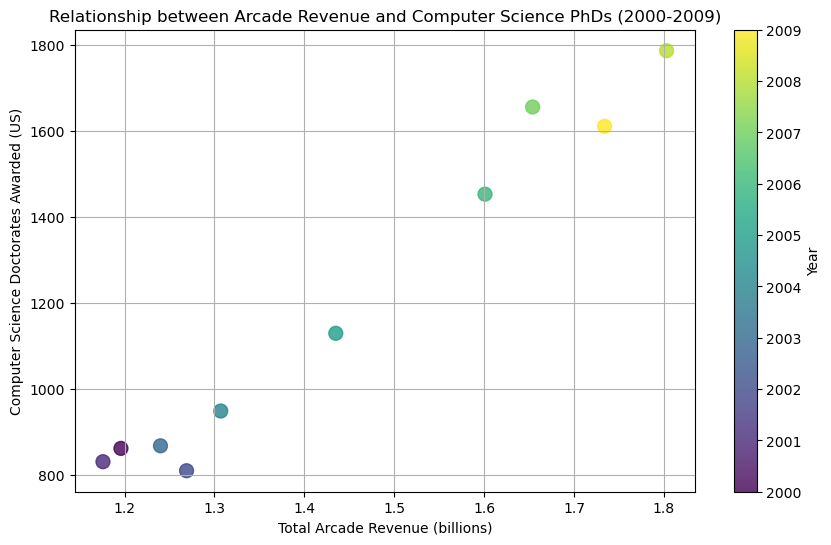

In [110]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

plt.figure(figsize=(10, 6))

plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
            c=data['Year'], cmap='viridis', s=100, alpha=0.8)

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')
plt.colorbar(label='Year')

plt.grid(True)
plt.show()
